# Credit card default propensity prediction

_Objective__ – Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.

# About the dataset
The dataset contains the following information of 30000 customers:
1.	__DEFAULT__ - Default payment next month (Yes=1, No=0)
2.	__LIMIT_BAL__ - Amount of the given credit (INR)  
3.	__SEX__ - Gender (1 = male; 2 = female)
4.	__EDUCATION__ - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
5.	__MARRIAGE__ - (1 = married; 2 = single; 3 = others)
6.	__AGE__ - (year)
7.	__PAST_PAY__ - History of repayment status
    <br> -  PAST_PAY1 = the repayment status in September 2005
    <br> -  PAST_PAY2 = the repayment status in August 2005
    <br> -  PAST_PAY6 = the repayment status in April 2005
    <br> -  The measurement scale for the repayment status is 
         i.  -1 = pay duly <br>
        ii.	 1 = payment delay for one month<br>
        iii. 2 = payment delay for two months <br>
        iv.	 8 = payment delay for eight months<br>
        v.	 9 = payment delay for nine months and above <br>
8.	__BILL_AMT__- Amount of bill statement (INR)
    <br> -  BILL_AMT1 = amount of bill statement in September 2005
    <br> -  BILL_AMT2 = amount of bill statement in August 2005
    <br> -  BILL_AMT6 = amount of bill statement in April 2005
9.	__PAY_AMT__ - Amount of previous payment (INR)
    <br> -  PAY_AMT1 = amount paid in September 2005
    <br> -  PAY_AMT2 = amount paid in August 2005
    <br> -  PAY_AMT6 = amount paid in April 2005

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore") 

## Reading Dataset

In [2]:
df1=pd.read_csv('credit_card.csv')
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1.shape

(30000, 25)

## Removing Duplicates

In [4]:
df1=df1.drop('ID',axis=1)

In [5]:
df1[df1.duplicated()].shape

(35, 24)

In [6]:
df=df1.drop_duplicates(keep='first')

In [7]:
df.shape

(29965, 24)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Frequency count

In [9]:
df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

In [10]:
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
df['DEFAULT'].value_counts(1)

0    0.778742
1    0.221258
Name: DEFAULT, dtype: float64

## Converting Categorical to Numerical

In [13]:
df['SEX']=df['SEX'].map({1:'Male',2:'Female'})

In [14]:
df['EDUCATION']=df['EDUCATION'].map({1:'GraduateSchool',2:'University',3:'HighSchool',4:'Others',0:'Others',5:'Others',6:'Others'})

In [15]:
df['MARRIAGE']=df['MARRIAGE'].map({1:'Married',2:'Single',3:'Others',0:'Others'})

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
df=pd.get_dummies(df,drop_first=True)

In [18]:
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_Male,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0


## Base Model Building

In [19]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [20]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [21]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### Logit Model

In [22]:
X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test)

In [23]:
Logit_model=sm.Logit(y_train,X_train_c)
result=Logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.461738
         Iterations 7


In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                20975
Model:                          Logit   Df Residuals:                    20948
Method:                           MLE   Df Model:                           26
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.1243
Time:                        23:30:07   Log-Likelihood:                -9684.9
converged:                       True   LL-Null:                       -11060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1162      0.099    -11.265      0.000      -1.310      -0.922
LIMIT_BAL            -7.467e-07   1.89e-07     -3.954      0.000   -1.12e-06   -3.77e-07
AGE                      0.0050      0.002      2.250      0.024       0.001       0.009
PAY_1                    0.5765      0.021     26.912      0.000       0.535       0.619
PAY_2                    0.1128      0.024      4.667      0.000       0.065       0.160
PAY_3                    0.0659      0.027      2.439      0.015       0.013       0.119
PAY_4                    0.0033      0.030      0.109      0.913      -0.055       0.062
PAY_5                    0.0455      0.032      1.410      0.159      -0.018       0.109
PAY_6                    0.0130      0.026      0.492      0.623      -0.039       0.065
BILL_AMT1            -4.556e-06   1.28e-06     -3.566      0.000   -7.06e-06   -2.05e-06
BILL_AMT2              8.41e-07   1.75e-06      0.480      0.631   -2.59e-06    4.27e-06
BILL_AMT3             1.691e-06   1.62e-06      1.042      0.298   -1.49e-06    4.87e-06
BILL_AMT4             5.484e-07   1.61e-06      0.340      0.734   -2.62e-06    3.71e-06
BILL_AMT5             8.276e-07   1.75e-06      0.472      0.637   -2.61e-06    4.26e-06
BILL_AMT6            -1.819e-07   1.34e-06     -0.135      0.892   -2.82e-06    2.45e-06
PAY_AMT1             -1.461e-05   2.87e-06     -5.083      0.000   -2.02e-05   -8.98e-06
PAY_AMT2             -7.899e-06   2.32e-06     -3.410      0.001   -1.24e-05   -3.36e-06
PAY_AMT3             -2.898e-06   2.01e-06     -1.441      0.150   -6.84e-06    1.04e-06
PAY_AMT4             -3.039e-06   2.11e-06     -1.443      0.149   -7.17e-06    1.09e-06
PAY_AMT5             -1.683e-06   1.97e-06     -0.855      0.392   -5.54e-06    2.17e-06
PAY_AMT6             -1.449e-06   1.46e-06     -0.991      0.322   -4.32e-06    1.42e-06
SEX_Male                 0.1444      0.037      3.929      0.000       0.072       0.216
EDUCATION_HighSchool    -0.1099      0.057     -1.936      0.053      -0.221       0.001
EDUCATION_Others        -0.9916      0.210     -4.727      0.000      -1.403      -0.580
EDUCATION_University    -0.0749      0.043     -1.750      0.080      -0.159       0.009
MARRIAGE_Others         -0.2842      0.165     -1.727      0.084      -0.607       0.038
MARRIAGE_Single         -0.2027      0.042     -4.879      0.000      -0.284      -0.121
========================================================================================
"""

In [25]:
y_prob=result.predict(X_test_c)
y_prob.head()

19379    0.200251
3295     0.552985
1541     0.246874
21170    0.160230
3273     0.219986
dtype: float64

In [26]:
y_test=pd.DataFrame(y_test)
y_test['Prob']=y_prob

In [27]:
y_test['Pred']=y_test['Prob'].apply(lambda x:0 if x<0.5 else 1)
y_test.head()

,DEFAULT,Prob,Pred
19379,0,0.200251,0
3295,1,0.552985,1
1541,0,0.246874,0
21170,0,0.160230,0
3273,0,0.219986,0


In [28]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,matthews_corrcoef,roc_curve,roc_auc_score,accuracy_score

In [29]:
cm=confusion_matrix(y_test['DEFAULT'],y_test['Pred'])
cm

array([[6775,  206],
       [1509,  500]], dtype=int64)

In [30]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
cm

,Predicted:0,Predicted:1
Actual:0,6775,206
Actual:1,1509,500


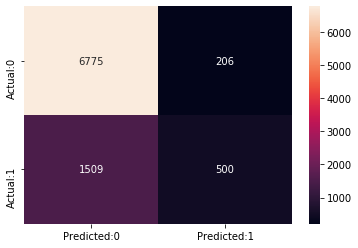

In [31]:
sns.heatmap(data=cm,annot=True,fmt='g')
plt.show()

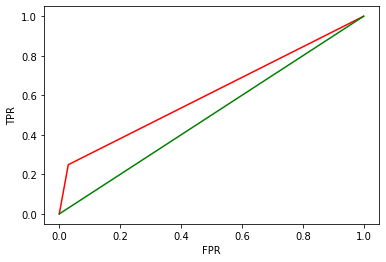

In [32]:
fpr,tpr,thresholds=roc_curve(y_test['DEFAULT'],y_test['Pred'])
plt.plot(fpr,tpr,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,fpr,color='g')
plt.show()

In [33]:
print('Cohen kappa Score:',cohen_kappa_score(y_test['DEFAULT'],y_test['Pred']))
print('Matthews coeff:',matthews_corrcoef(y_test['DEFAULT'],y_test['Pred']))
print('Roc Auc Score:',roc_auc_score(y_test['DEFAULT'],y_test['Pred']))
print('Accuracy Score:',accuracy_score(y_test['DEFAULT'],y_test['Pred']))
print(classification_report(y_test['DEFAULT'],y_test['Pred']))

Cohen kappa Score: 0.2852557365762092
Matthews coeff: 0.3397084470785984
Roc Auc Score: 0.6096856867203158
Accuracy Score: 0.8092324805339266
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6981
           1       0.71      0.25      0.37      2009

    accuracy                           0.81      8990
   macro avg       0.76      0.61      0.63      8990
weighted avg       0.79      0.81      0.77      8990



### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression(class_weight=({1:77,0:22}))

In [36]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
lr_model=lr.fit(X_train,y_train)
ypred_lr=lr_model.predict(X_test)

In [39]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_lr))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_lr))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_lr))
print('Accuracy Score:',accuracy_score(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))
print(confusion_matrix(y_test,ypred_lr))

Cohen kappa Score: 0.15579203908647232
Matthews coeff: 0.16326377492839989
Roc Auc Score: 0.5933329383196045
Accuracy Score: 0.6489432703003337
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      6981
           1       0.32      0.49      0.39      2009

    accuracy                           0.65      8990
   macro avg       0.57      0.59      0.57      8990
weighted avg       0.71      0.65      0.67      8990

[[4844 2137]
 [1019  990]]


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt=DecisionTreeClassifier()

In [42]:
dt_model=dt.fit(X_train,y_train)
ypred_dt=dt_model.predict(X_test)

In [43]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt))
print(confusion_matrix(y_test,ypred_dt))

Cohen kappa Score: 0.21171285216040647
Matthews coeff: 0.21182208515075696
Roc Auc Score: 0.6077703335990764
Accuracy Score: 0.72146829810901
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6981
           1       0.38      0.40      0.39      2009

    accuracy                           0.72      8990
   macro avg       0.60      0.61      0.61      8990
weighted avg       0.73      0.72      0.72      8990

[[5678 1303]
 [1201  808]]


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

In [46]:
rf_model=rf.fit(X_train,y_train)
ypred_rf=rf_model.predict(X_test)

In [47]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_rf))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_rf))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_rf))
print('Accuracy Score:',accuracy_score(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))
print(confusion_matrix(y_test,ypred_rf))

Cohen kappa Score: 0.3678099333028495
Matthews coeff: 0.3882052932497079
Roc Auc Score: 0.6562614774126657
Accuracy Score: 0.8135706340378198
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6981
           1       0.64      0.37      0.47      2009

    accuracy                           0.81      8990
   macro avg       0.74      0.66      0.68      8990
weighted avg       0.80      0.81      0.79      8990

[[6567  414]
 [1262  747]]


### Naive Baye's

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
nb=GaussianNB()

In [50]:
nb_model=nb.fit(X_train,y_train)
ypred_nb=nb_model.predict(X_test)

In [51]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_nb))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_nb))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_nb))
print('Accuracy Score:',accuracy_score(y_test,ypred_nb))
print(classification_report(y_test,ypred_nb))
print(confusion_matrix(y_test,ypred_nb))

Cohen kappa Score: 0.0673246722309816
Matthews coeff: 0.1272824385933174
Roc Auc Score: 0.5634371014434472
Accuracy Score: 0.3899888765294772
              precision    recall  f1-score   support

           0       0.88      0.25      0.39      6981
           1       0.25      0.88      0.39      2009

    accuracy                           0.39      8990
   macro avg       0.56      0.56      0.39      8990
weighted avg       0.74      0.39      0.39      8990

[[1744 5237]
 [ 247 1762]]


### KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [54]:
X_train_s, X_test, y_train_s, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [55]:
knn=KNeighborsClassifier()

In [56]:
model_knn=knn.fit(X_train_s,y_train_s)
ypred_knn=model_knn.predict(X_test)

In [57]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_knn))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_knn))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_knn))
print('Accuracy Score:',accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))
print(confusion_matrix(y_test,ypred_knn))

Cohen kappa Score: 0.2965032647917436
Matthews coeff: 0.30944987533454715
Roc Auc Score: 0.627990794041054
Accuracy Score: 0.789210233592881
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6981
           1       0.55      0.34      0.42      2009

    accuracy                           0.79      8990
   macro avg       0.69      0.63      0.64      8990
weighted avg       0.77      0.79      0.77      8990

[[6419  562]
 [1333  676]]


In [58]:
from sklearn.metrics import plot_roc_curve

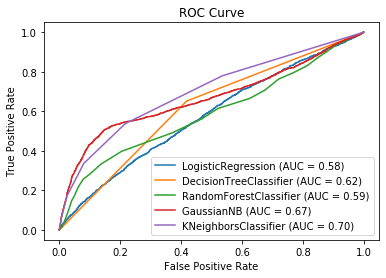

In [59]:
disp=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_);
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_);
plot_roc_curve(nb,X_test,y_test,ax=disp.ax_);
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_);
#plt.figure(figsize=(25,8))
plt.title('ROC Curve')
plt.show()

## Recursive feature elimination and cross-validation

In [60]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [161]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [162]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [163]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#### Logistic Regression 

In [164]:
lr_rfecv=RFECV(estimator=lr,step=1,cv=StratifiedKFold(10,random_state=0),scoring='f1_weighted')

In [165]:
lr_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight={0: 22, 1: 77},
                                   dual=False, fit_intercept=True,
                                   intercept_scaling=1, l1_ratio=None,
                                   max_iter=100, multi_class='auto',
                                   n_jobs=None, penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [166]:
lr_rfecv.n_features_

3

In [167]:
lr_rfecv.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True])

In [169]:
x.iloc[:,np.where(lr_rfecv.support_==False)[0]].columns

Index(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_University',
       'MARRIAGE_Others'],
      dtype='object')

In [170]:
lr_xtrain=X_train.drop(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_University',
       'MARRIAGE_Others'],axis=1)
lr_xtest=X_test.drop(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_University',
       'MARRIAGE_Others'],axis=1)

In [171]:
lr_model_rfecv=lr.fit(lr_xtrain,y_train)
ypred_lr_rfecv=lr_model_rfecv.predict(lr_xtest)

In [172]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_lr_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_lr_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_lr_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_lr_rfecv))
print(classification_report(y_test,ypred_lr_rfecv))
print(confusion_matrix(y_test,ypred_lr_rfecv))

Cohen kappa Score: 0.36179651695692017
Matthews coeff: 0.36192089418008955
Roc Auc Score: 0.6835778806544506
Accuracy Score: 0.7765726681127982
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4665
           1       0.50      0.52      0.51      1328

    accuracy                           0.78      5993
   macro avg       0.68      0.68      0.68      5993
weighted avg       0.78      0.78      0.78      5993

[[3968  697]
 [ 642  686]]


#### Decision Tree

In [173]:
dt_rfecv=RFECV(estimator=dt,step=1,cv=StratifiedKFold(10,random_state=0),scoring='f1_weighted')

In [74]:
dt_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [75]:
dt_rfecv.n_features_

15

In [76]:
dt_rfecv.support_

array([ True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False])

In [77]:
a=x.iloc[:,np.where(dt_rfecv.support_==False)[0]].columns
a.values

array(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_Male',
       'EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Others', 'MARRIAGE_Single'], dtype=object)

In [78]:
dt_xtrain=X_train.drop(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)
dt_xtest=X_test.drop(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)

In [79]:
dt_rfecv=dt.fit(dt_xtrain,y_train)
ypred_dt_rfecv=dt_rfecv.predict(dt_xtest)

In [80]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt_rfecv))
print(classification_report(y_test,ypred_dt_rfecv))
print(confusion_matrix(y_test,ypred_dt_rfecv))

Cohen kappa Score: 0.20280754777038124
Matthews coeff: 0.2029640928651514
Roc Auc Score: 0.6036705503686772
Accuracy Score: 0.7188386450859335
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4665
           1       0.37      0.40      0.38      1328

    accuracy                           0.72      5993
   macro avg       0.60      0.60      0.60      5993
weighted avg       0.73      0.72      0.72      5993

[[3781  884]
 [ 801  527]]


#### Random Forest

In [81]:
rf_rfecv=RFECV(estimator=rf,step=1,cv=StratifiedKFold(10,random_state=0),scoring='f1_weighted')

In [82]:
rf_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [315]:
rf_rfecv.n_features_

23

In [316]:
rf_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True])

In [317]:
x.iloc[:,np.where(rf_rfecv.support_==False)[0]].columns

Index(['EDUCATION_HighSchool', 'EDUCATION_Others', 'MARRIAGE_Others'], dtype='object')

In [318]:
rf_xtrain=X_train.drop(['EDUCATION_HighSchool', 'EDUCATION_Others', 'MARRIAGE_Others'],axis=1)
rf_xtest=X_test.drop(['EDUCATION_HighSchool', 'EDUCATION_Others', 'MARRIAGE_Others'],axis=1)

In [319]:
rf_rfecv=dt.fit(rf_xtrain,y_train)
ypred_rf_rfecv=rf_rfecv.predict(rf_xtest)

In [320]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_rf_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_rf_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_rf_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_rf_rfecv))
print(classification_report(y_test,ypred_rf_rfecv))
print(confusion_matrix(y_test,ypred_rf_rfecv))

Cohen kappa Score: 0.21998289530624293
Matthews coeff: 0.2201649219516125
Roc Auc Score: 0.6125390630044292
Accuracy Score: 0.7246787919239113
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4665
           1       0.39      0.41      0.40      1328

    accuracy                           0.72      5993
   macro avg       0.61      0.61      0.61      5993
weighted avg       0.73      0.72      0.73      5993

[[3797  868]
 [ 782  546]]


## SMOTE_TOMEK

###### Combination of Over and Under Sampling

In [61]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score,KFold
from sklearn import model_selection

In [62]:
smt=SMOTETomek(random_state=42)

In [63]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [64]:
x_smote,y_smote=smt.fit_sample(x,y)

In [65]:
#https://imbalanced-learn.readthedocs.io/en/stable/combine.html#combine
from collections import Counter

In [66]:
print("Orignal Data Count{}".format(Counter(df["DEFAULT"])))
print("Revised Data Count{}".format(Counter(y_smote)))

Orignal Data CountCounter({0: 23335, 1: 6630})
Revised Data CountCounter({1: 22684, 0: 22684})


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

#### Logistic Regression

In [68]:
lr_model_smt=lr.fit(X_train,y_train)
lr_model_smt_pred=lr_model_smt.predict(X_test)

In [69]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(lr,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in LR after SMOTE TOMEK', r_scores.mean())
print('Bias Error in LR after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in LR after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,lr_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,lr_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,lr_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_model_smt_pred))
print(classification_report(y_test,lr_model_smt_pred))
print(confusion_matrix(y_test,lr_model_smt_pred))

Mean weighted F1-score in LR after SMOTE TOMEK 0.4095213975713533
Bias Error in LR after SMOTE TOMEK 0.5904786024286467
Variance Error in LR after SMOTE TOMEK 0.0001839239070164415
Cohen kappa Score: 0.09015724467879493
Matthews coeff: 0.16827775900263492
Roc Auc Score: 0.5452216956016495
Accuracy Score: 0.5436411725810006
              precision    recall  f1-score   support

           0       0.79      0.12      0.21      4554
           1       0.52      0.97      0.68      4520

    accuracy                           0.54      9074
   macro avg       0.66      0.55      0.45      9074
weighted avg       0.66      0.54      0.45      9074

[[ 562 3992]
 [ 149 4371]]


#### Decision Tree

In [70]:
dt_model_smt=dt.fit(X_train,y_train)
dt_model_smt_pred=dt_model_smt.predict(X_test)

In [71]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(dt,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in DT after SMOTE TOMEK', r_scores.mean())
print('Bias Error in DT after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in DT after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,dt_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,dt_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,dt_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,dt_model_smt_pred))
print(classification_report(y_test,dt_model_smt_pred))
print(confusion_matrix(y_test,dt_model_smt_pred))

Mean weighted F1-score in DT after SMOTE TOMEK 0.8166991326082345
Bias Error in DT after SMOTE TOMEK 0.18330086739176554
Variance Error in DT after SMOTE TOMEK 4.0880342616996204e-05
Cohen kappa Score: 0.6358914623765756
Matthews coeff: 0.6359241470224214
Roc Auc Score: 0.8179578101134469
Accuracy Score: 0.8179413709499669
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4554
           1       0.81      0.82      0.82      4520

    accuracy                           0.82      9074
   macro avg       0.82      0.82      0.82      9074
weighted avg       0.82      0.82      0.82      9074

[[3705  849]
 [ 803 3717]]


#### Random Forest

In [72]:
rf_model_smt=rf.fit(X_train,y_train)
rf_model_smt_pred=rf_model_smt.predict(X_test)

In [73]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(rf,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in RF after SMOTE TOMEK', r_scores.mean())
print('Bias Error in Rf after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in RF after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,rf_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,rf_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,rf_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,rf_model_smt_pred))
print(classification_report(y_test,rf_model_smt_pred))
print(confusion_matrix(y_test,rf_model_smt_pred))

Mean weighted F1-score in RF after SMOTE TOMEK 0.8846219538733623
Bias Error in Rf after SMOTE TOMEK 0.11537804612663771
Variance Error in RF after SMOTE TOMEK 4.370015694084702e-05
Cohen kappa Score: 0.7671565070637851
Matthews coeff: 0.7710294866008781
Roc Auc Score: 0.883434430880564
Accuracy Score: 0.8836235397839982
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4554
           1       0.93      0.83      0.88      4520

    accuracy                           0.88      9074
   macro avg       0.89      0.88      0.88      9074
weighted avg       0.89      0.88      0.88      9074

[[4253  301]
 [ 755 3765]]


#### Naive Bayes

In [74]:
nb_model_smt=nb.fit(X_train,y_train)
nb_model_smt_pred=nb_model_smt.predict(X_test)

In [75]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(nb,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,nb_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,nb_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,nb_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,nb_model_smt_pred))
print(classification_report(y_test,nb_model_smt_pred))
print(confusion_matrix(y_test,nb_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.47045778958284046
Bias Error in NB after SMOTE TOMEK 0.5295422104171595
Variance Error in NB after SMOTE TOMEK 8.002365024133676e-05
Cohen kappa Score: 0.10177046857696692
Matthews coeff: 0.15946757022437977
Roc Auc Score: 0.551032448377581
Accuracy Score: 0.549592241569319
              precision    recall  f1-score   support

           0       0.72      0.17      0.27      4554
           1       0.53      0.94      0.67      4520

    accuracy                           0.55      9074
   macro avg       0.62      0.55      0.47      9074
weighted avg       0.62      0.55      0.47      9074

[[ 759 3795]
 [ 292 4228]]


## KNN

In [76]:
sc=StandardScaler()

In [77]:
xsmote_scaled=sc.fit_transform(x_smote)

In [78]:
X_train_ssc, X_test, y_train_ssc, y_test = train_test_split(xsmote_scaled,y_smote,test_size=0.3,random_state=1)

In [79]:
knn=KNeighborsClassifier()

In [80]:
knn_model_smt=knn.fit(X_train_ssc,y_train_ssc)
knn_model_smt_pred=nb_model_smt.predict(X_test)

In [81]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(knn,X_train_ssc,y_train_ssc,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,knn_model_smt_pred))
#print('Matthews coeff:',matthews_corrcoef(y_test,knn_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,knn_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,knn_model_smt_pred))
print(classification_report(y_test,knn_model_smt_pred))
print(confusion_matrix(y_test,knn_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.7917374696194577
Bias Error in NB after SMOTE TOMEK 0.20826253038054232
Variance Error in NB after SMOTE TOMEK 4.355979154133736e-05
Cohen kappa Score: 0.0
Roc Auc Score: 0.5
Accuracy Score: 0.49606935566820953
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6859
           1       0.50      1.00      0.66      6752

    accuracy                           0.50     13611
   macro avg       0.25      0.50      0.33     13611
weighted avg       0.25      0.50      0.33     13611

[[   0 6859]
 [   0 6752]]


# Feature Engineering

In [82]:
df2=pd.read_csv('credit_card.csv')
df2=df2.drop('ID',axis=1)

In [83]:
df=df2.drop_duplicates(keep='first')
df.shape

(29965, 24)

In [84]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [85]:
df['SEX']=df['SEX'].map({1:'Male',2:'Female'})

In [86]:
df['EDUCATION']=df['EDUCATION'].map({1:'GraduateSchool',2:'University',3:'HighSchool',4:'Others',0:'Others',5:'Others',6:'Others'})

In [87]:
df['MARRIAGE']=df['MARRIAGE'].map({1:'Married',2:'Single',3:'Others',0:'Others'})

### New Feature Creation

In [88]:
df['DEMOGRAPHICS']=df['SEX'].astype('str')+'_'+df['EDUCATION']+'_'+df['MARRIAGE']

In [89]:
def age_cat(y):
    if y>=20 and y<40:
        return "Young"
    elif y>=40 and y<60:
        return "Middle Aged"
    elif y>=60 and y<80:
        return "Senior Citizens"

In [90]:
df['Age_Category']=df['AGE'].apply(age_cat)

In [91]:
def limit_cat(x):
    if x>=10000 and x<208000:
        return "Low Limit Holder"
    elif x>=208000 and x<406000:
        return "Medium Limit Holder"
    elif x>=406000 and x<604000:
        return "High Limit Holder"
    elif x>=604000 and x<802000:
        return "Very High Limit Holder"
    elif x>=802000 and x<1000000:
        return "Ultra High Limit Holder"

In [92]:
df['Credit_Limit_Category']=df['LIMIT_BAL'].apply(limit_cat)

In [93]:
df['TOTAL_RISK_VALUE']=df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']

In [94]:
df["Avg.Bill"]=(df["BILL_AMT1"]+df["BILL_AMT2"]+df["BILL_AMT3"]+df["BILL_AMT4"]+df["BILL_AMT5"]+df["BILL_AMT6"])/6

In [95]:
df["Avg.Outstanding"]=((df["BILL_AMT6"]-df["PAY_AMT5"])+(df["BILL_AMT5"]-df["PAY_AMT4"])+(df["BILL_AMT4"]-df["PAY_AMT3"])+(df["BILL_AMT3"]-df["PAY_AMT2"])+(df["BILL_AMT2"]-df["PAY_AMT1"]))/5

In [96]:
df["Avg.Pay"]=(df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"])/6

In [97]:
df.shape

(29965, 31)

In [98]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEMOGRAPHICS,Age_Category,Credit_Limit_Category,TOTAL_RISK_VALUE,Avg.Bill,Avg.Outstanding,Avg.Pay
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,Female_University_Married,Young,Low Limit Holder,-2,1284.000000,620.4,114.833333
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Female_University_Single,Young,Low Limit Holder,3,2846.166667,2279.0,833.333333
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Female_University_Single,Young,Low Limit Holder,0,16942.166667,13279.2,1836.333333
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Female_University_Married,Young,Low Limit Holder,0,38555.666667,35391.2,1398.000000
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Male_University_Married,Middle Aged,Low Limit Holder,-2,18223.166667,8470.4,9841.500000


In [99]:
df.drop(['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)

In [100]:
df.head()

,DEFAULT,DEMOGRAPHICS,Age_Category,Credit_Limit_Category,TOTAL_RISK_VALUE,Avg.Bill,Avg.Outstanding,Avg.Pay
0,1,Female_University_Married,Young,Low Limit Holder,-2,1284.000000,620.4,114.833333
1,1,Female_University_Single,Young,Low Limit Holder,3,2846.166667,2279.0,833.333333
2,0,Female_University_Single,Young,Low Limit Holder,0,16942.166667,13279.2,1836.333333
3,0,Female_University_Married,Young,Low Limit Holder,0,38555.666667,35391.2,1398.000000
4,0,Male_University_Married,Middle Aged,Low Limit Holder,-2,18223.166667,8470.4,9841.500000


In [101]:
df=pd.get_dummies(df,drop_first=True)

In [102]:
df.head()

,DEFAULT,TOTAL_RISK_VALUE,Avg.Bill,Avg.Outstanding,Avg.Pay,DEMOGRAPHICS_Female_GraduateSchool_Others,DEMOGRAPHICS_Female_GraduateSchool_Single,DEMOGRAPHICS_Female_HighSchool_Married,DEMOGRAPHICS_Female_HighSchool_Others,DEMOGRAPHICS_Female_HighSchool_Single,DEMOGRAPHICS_Female_Others_Married,DEMOGRAPHICS_Female_Others_Others,DEMOGRAPHICS_Female_Others_Single,DEMOGRAPHICS_Female_University_Married,DEMOGRAPHICS_Female_University_Others,DEMOGRAPHICS_Female_University_Single,DEMOGRAPHICS_Male_GraduateSchool_Married,DEMOGRAPHICS_Male_GraduateSchool_Others,DEMOGRAPHICS_Male_GraduateSchool_Single,DEMOGRAPHICS_Male_HighSchool_Married,DEMOGRAPHICS_Male_HighSchool_Others,DEMOGRAPHICS_Male_HighSchool_Single,DEMOGRAPHICS_Male_Others_Married,DEMOGRAPHICS_Male_Others_Others,DEMOGRAPHICS_Male_Others_Single,DEMOGRAPHICS_Male_University_Married,DEMOGRAPHICS_Male_University_Others,DEMOGRAPHICS_Male_University_Single,Age_Category_Senior Citizens,Age_Category_Young,Credit_Limit_Category_Low Limit Holder,Credit_Limit_Category_Medium Limit Holder,Credit_Limit_Category_Very High Limit Holder
0,1,-2,1284.000000,620.4,114.833333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,3,2846.166667,2279.0,833.333333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,16942.166667,13279.2,1836.333333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,38555.666667,35391.2,1398.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,-2,18223.166667,8470.4,9841.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [103]:
df.shape

(29965, 33)

In [104]:
df['DEFAULT'].value_counts(1)

0    0.778742
1    0.221258
Name: DEFAULT, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,matthews_corrcoef,roc_curve,roc_auc_score,accuracy_score

In [107]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Logit Model

In [109]:
X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test)

In [110]:
Logit_model=sm.Logit(y_train,X_train_c)
result=Logit_model.fit()

         Current function value: 0.476627
         Iterations: 35


In [111]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                20975
Model:                          Logit   Df Residuals:                    20942
Method:                           MLE   Df Model:                           32
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.09579
Time:                        23:35:45   Log-Likelihood:                -9997.3
converged:                      False   LL-Null:                       -11056.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.7711      0.122     -6.333      0.000      -1.010      -0.532
TOTAL_RISK_VALUE                                 0.1130      0.004     31.835      0.000       0.106       0.120
Avg.Bill                                     -2.432e-05   4.78e-06     -5.088      0.000   -3.37e-05    -1.5e-05
Avg.Outstanding                               2.371e-05    4.9e-06      4.841      0.000    1.41e-05    3.33e-05
Avg.Pay                                      -2.937e-05   5.71e-06     -5.143      0.000   -4.06e-05   -1.82e-05
DEMOGRAPHICS_Female_GraduateSchool_Others      -13.7497    704.159     -0.020      0.984   -1393.876    1366.377
DEMOGRAPHICS_Female_GraduateSchool_Single       -0.3084      0.088     -3.490      0.000      -0.482      -0.135
DEMOGRAPHICS_Female_HighSchool_Married          -0.2575      0.101     -2.544      0.011      -0.456      -0.059
DEMOGRAPHICS_Female_HighSchool_Others           -0.8914      0.349     -2.557      0.011      -1.575      -0.208
DEMOGRAPHICS_Female_HighSchool_Single           -0.3385      0.120     -2.832      0.005      -0.573      -0.104
DEMOGRAPHICS_Female_Others_Married              -1.4036      0.431     -3.258      0.001      -2.248      -0.559
DEMOGRAPHICS_Female_Others_Others              -11.7859    303.570     -0.039      0.969    -606.772     583.200
DEMOGRAPHICS_Female_Others_Single               -0.7449      0.363     -2.052      0.040      -1.456      -0.034
DEMOGRAPHICS_Female_University_Married          -0.1723      0.085     -2.037      0.042      -0.338      -0.007
DEMOGRAPHICS_Female_University_Others           -0.7201      0.322     -2.239      0.025      -1.351      -0.090
DEMOGRAPHICS_Female_University_Single           -0.3389      0.088     -3.860      0.000      -0.511      -0.167
DEMOGRAPHICS_Male_GraduateSchool_Married         0.0438      0.104      0.422      0.673      -0.160       0.247
DEMOGRAPHICS_Male_GraduateSchool_Others         -0.2080      0.588     -0.354      0.724      -1.361       0.945
DEMOGRAPHICS_Male_GraduateSchool_Single         -0.2860      0.095     -3.000      0.003      -0.473      -0.099
DEMOGRAPHICS_Male_HighSchool_Married            -0.0507      0.115     -0.442      0.658      -0.275       0.174
DEMOGRAPHICS_Male_HighSchool_Others             -0.2622      0.419     -0.625      0.532      -1.084       0.560
DEMOGRAPHICS_Male_HighSchool_Single             -0.2063      0.122     -1.695      0.090      -0.445       0.032
DEMOGRAPHICS_Male_Others_Married                -0.9667      0.477     -2.026      0.043      -1.902      -0.032
DEMOGRAPHICS_Male_Others_Others               -123.2469   1.23e+27     -1e-25      1.000   -2.41e+27    2.41e+27
DEMOGRAPHICS_Male_Others_Single                 -1.7925      0.611     -2.932      0.003      -2.991      -0.594
DEMOGRAPHICS_Male_University_Married            -0.0171      0.093     -0.184

In [112]:
y_prob=result.predict(X_test_c)
y_prob.head()

29334    0.237649
24426    0.068186
9822     0.190189
20887    0.250892
21692    0.113824
dtype: float64

In [113]:
y_test=pd.DataFrame(y_test)
y_test['Prob']=y_prob

In [114]:
y_test['Pred']=y_test['Prob'].apply(lambda x:0 if x<=0.2 else 1)
y_test.head()

,DEFAULT,Prob,Pred
29334,0,0.237649,1
24426,0,0.068186,0
9822,0,0.190189,0
20887,0,0.250892,1
21692,0,0.113824,0


In [115]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,matthews_corrcoef,roc_curve,roc_auc_score,accuracy_score

In [116]:
cm=confusion_matrix(y_test['DEFAULT'],y_test['Pred'])
cm

array([[3875, 3103],
       [ 641, 1371]], dtype=int64)

In [117]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
cm

,Predicted:0,Predicted:1
Actual:0,3875,3103
Actual:1,641,1371


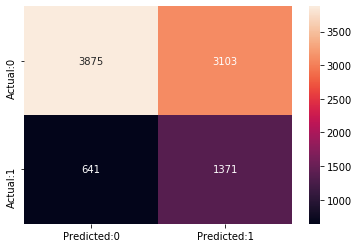

In [118]:
sns.heatmap(data=cm,annot=True,fmt='g')
plt.show()

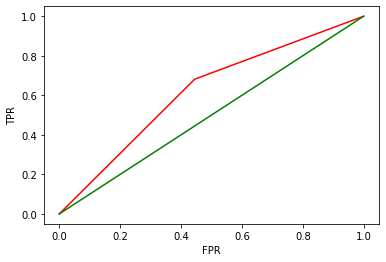

In [119]:
fpr,tpr,thresholds=roc_curve(y_test['DEFAULT'],y_test['Pred'])
plt.plot(fpr,tpr,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,fpr,color='g')
plt.show()

In [120]:
print('Cohen kappa Score:',cohen_kappa_score(y_test['DEFAULT'],y_test['Pred']))
print('Matthews coeff:',matthews_corrcoef(y_test['DEFAULT'],y_test['Pred']))
print('Roc Auc Score:',roc_auc_score(y_test['DEFAULT'],y_test['Pred']))
print('Accuracy Score:',accuracy_score(y_test['DEFAULT'],y_test['Pred']))
print(classification_report(y_test['DEFAULT'],y_test['Pred']))

Cohen kappa Score: 0.16491943931394037
Matthews coeff: 0.19733521099915785
Roc Auc Score: 0.6183641202370187
Accuracy Score: 0.5835372636262514
              precision    recall  f1-score   support

           0       0.86      0.56      0.67      6978
           1       0.31      0.68      0.42      2012

    accuracy                           0.58      8990
   macro avg       0.58      0.62      0.55      8990
weighted avg       0.73      0.58      0.62      8990



### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lr=LogisticRegression(class_weight=({1:77,0:22}))

In [123]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [125]:
lr_model=lr.fit(X_train,y_train)
ypred_lr=lr_model.predict(X_test)

In [126]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_lr))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_lr))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_lr))
print('Accuracy Score:',accuracy_score(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))
print(confusion_matrix(y_test,ypred_lr))

Cohen kappa Score: 0.12405146714341786
Matthews coeff: 0.12784588053769502
Roc Auc Score: 0.5716019425263581
Accuracy Score: 0.6490545050055617
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      6981
           1       0.30      0.43      0.35      2009

    accuracy                           0.65      8990
   macro avg       0.56      0.57      0.56      8990
weighted avg       0.70      0.65      0.67      8990

[[4968 2013]
 [1142  867]]


### Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dt=DecisionTreeClassifier()

In [129]:
dt_model=dt.fit(X_train,y_train)
ypred_dt=dt_model.predict(X_test)

In [130]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt))
print(confusion_matrix(y_test,ypred_dt))

Cohen kappa Score: 0.19344626299640644
Matthews coeff: 0.19344982581244852
Roc Auc Score: 0.5970488838045725
Accuracy Score: 0.7191323692992213
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6981
           1       0.37      0.38      0.37      2009

    accuracy                           0.72      8990
   macro avg       0.60      0.60      0.60      8990
weighted avg       0.72      0.72      0.72      8990

[[5709 1272]
 [1253  756]]


### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf=RandomForestClassifier()

In [133]:
rf_model=rf.fit(X_train,y_train)
ypred_rf=rf_model.predict(X_test)

In [134]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_rf))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_rf))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_rf))
print('Accuracy Score:',accuracy_score(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))
print(confusion_matrix(y_test,ypred_rf))

Cohen kappa Score: 0.27950551029274195
Matthews coeff: 0.2981654138255767
Roc Auc Score: 0.6171853147015197
Accuracy Score: 0.7903225806451613
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      6981
           1       0.56      0.30      0.39      2009

    accuracy                           0.79      8990
   macro avg       0.69      0.62      0.63      8990
weighted avg       0.76      0.79      0.77      8990

[[6494  487]
 [1398  611]]


### Naive Baye's

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
nb=GaussianNB()

In [137]:
nb_model=nb.fit(X_train,y_train)
ypred_nb=nb_model.predict(X_test)

In [138]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_nb))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_nb))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_nb))
print('Accuracy Score:',accuracy_score(y_test,ypred_nb))
print(classification_report(y_test,ypred_nb))
print(confusion_matrix(y_test,ypred_nb))

Cohen kappa Score: 0.2713352186883137
Matthews coeff: 0.30798364672477163
Roc Auc Score: 0.6075314002045943
Accuracy Score: 0.7995550611790879
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6981
           1       0.62      0.26      0.37      2009

    accuracy                           0.80      8990
   macro avg       0.72      0.61      0.62      8990
weighted avg       0.77      0.80      0.77      8990

[[6665  316]
 [1486  523]]


### KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [140]:
sc=StandardScaler()

In [141]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [142]:
x_scaled=sc.fit_transform(x)

In [143]:
X_train_s, X_test, y_train_s, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [144]:
knn=KNeighborsClassifier()

In [145]:
model_knn=knn.fit(X_train_s,y_train_s)
ypred_knn=model_knn.predict(X_test)

In [146]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_knn))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_knn))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_knn))
print('Accuracy Score:',accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))
print(confusion_matrix(y_test,ypred_knn))

Cohen kappa Score: 0.25435425221407537
Matthews coeff: 0.265856944035777
Roc Auc Score: 0.6095484657959109
Accuracy Score: 0.7770856507230256
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6981
           1       0.50      0.31      0.38      2009

    accuracy                           0.78      8990
   macro avg       0.66      0.61      0.62      8990
weighted avg       0.75      0.78      0.76      8990

[[6370  611]
 [1393  616]]


## Recursive feature elimination and cross-validation

In [147]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [148]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [149]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#### Logistic Regression 

In [150]:
lr_rfecv=RFECV(estimator=lr,step=1,cv=StratifiedKFold(5,random_state=1),scoring='f1_weighted')

In [151]:
lr_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight={0: 22, 1: 77},
                                   dual=False, fit_intercept=True,
                                   intercept_scaling=1, l1_ratio=None,
                                   max_iter=100, multi_class='auto',
                                   n_jobs=None, penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [152]:
lr_rfecv.n_features_

29

In [153]:
lr_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [154]:
x.iloc[:,np.where(lr_rfecv.support_==False)[0]].columns

Index(['DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_Others_Others'],
      dtype='object')

In [155]:
lr_xtrain=X_train.drop(['DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_Others_Others'],axis=1)
lr_xtest=X_test.drop(['DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_Others_Others'],axis=1)

In [156]:
lr_model_rfecv=lr.fit(lr_xtrain,y_train)
ypred_lr_rfecv=lr_model_rfecv.predict(lr_xtest)

In [157]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_lr_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_lr_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_lr_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_lr_rfecv))
print(classification_report(y_test,ypred_lr_rfecv))
print(confusion_matrix(y_test,ypred_lr_rfecv))

Cohen kappa Score: 0.33562628174867126
Matthews coeff: 0.33563189902532686
Roc Auc Score: 0.6683554959387389
Accuracy Score: 0.7700650759219089
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4665
           1       0.48      0.49      0.48      1328

    accuracy                           0.77      5993
   macro avg       0.67      0.67      0.67      5993
weighted avg       0.77      0.77      0.77      5993

[[3970  695]
 [ 683  645]]


#### Decision Tree

In [158]:
dt_rfecv=RFECV(estimator=dt,step=1,cv=StratifiedKFold(5,random_state=0),scoring='f1_weighted')

In [159]:
dt_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [160]:
dt_rfecv.n_features_

7

In [161]:
dt_rfecv.support_

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [162]:
x.iloc[:,np.where(dt_rfecv.support_==False)[0]].columns

Index(['DEMOGRAPHICS_Female_GraduateSchool_Others',
       'DEMOGRAPHICS_Female_GraduateSchool_Single',
       'DEMOGRAPHICS_Female_HighSchool_Married',
       'DEMOGRAPHICS_Female_HighSchool_Others',
       'DEMOGRAPHICS_Female_HighSchool_Single',
       'DEMOGRAPHICS_Female_Others_Married',
       'DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Female_Others_Single',
       'DEMOGRAPHICS_Female_University_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Married',
       'DEMOGRAPHICS_Male_GraduateSchool_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Single',
       'DEMOGRAPHICS_Male_HighSchool_Married',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_HighSchool_Single',
       'DEMOGRAPHICS_Male_Others_Married', 'DEMOGRAPHICS_Male_Others_Others',
       'DEMOGRAPHICS_Male_Others_Single',
       'DEMOGRAPHICS_Male_University_Married',
       'DEMOGRAPHICS_Male_University_Others',
       'DEMOGRAPHICS_Male_University_Single', 'Age_Category_Senior 

In [163]:
dt_xtrain=X_train.drop(['DEMOGRAPHICS_Female_GraduateSchool_Others',
       'DEMOGRAPHICS_Female_GraduateSchool_Single',
       'DEMOGRAPHICS_Female_HighSchool_Married',
       'DEMOGRAPHICS_Female_HighSchool_Others',
       'DEMOGRAPHICS_Female_HighSchool_Single',
       'DEMOGRAPHICS_Female_Others_Married',
       'DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Female_Others_Single',
       'DEMOGRAPHICS_Female_University_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Married',
       'DEMOGRAPHICS_Male_GraduateSchool_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Single',
       'DEMOGRAPHICS_Male_HighSchool_Married',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_HighSchool_Single',
       'DEMOGRAPHICS_Male_Others_Married', 'DEMOGRAPHICS_Male_Others_Others',
       'DEMOGRAPHICS_Male_Others_Single',
       'DEMOGRAPHICS_Male_University_Married',
       'DEMOGRAPHICS_Male_University_Others',
       'DEMOGRAPHICS_Male_University_Single', 'Age_Category_Senior Citizens',
       'Credit_Limit_Category_Low Limit Holder',
       'Credit_Limit_Category_Medium Limit Holder',
       'Credit_Limit_Category_Very High Limit Holder'],axis=1)
dt_xtest=X_test.drop(['DEMOGRAPHICS_Female_GraduateSchool_Others',
       'DEMOGRAPHICS_Female_GraduateSchool_Single',
       'DEMOGRAPHICS_Female_HighSchool_Married',
       'DEMOGRAPHICS_Female_HighSchool_Others',
       'DEMOGRAPHICS_Female_HighSchool_Single',
       'DEMOGRAPHICS_Female_Others_Married',
       'DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Female_Others_Single',
       'DEMOGRAPHICS_Female_University_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Married',
       'DEMOGRAPHICS_Male_GraduateSchool_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Single',
       'DEMOGRAPHICS_Male_HighSchool_Married',
       'DEMOGRAPHICS_Male_HighSchool_Others',
       'DEMOGRAPHICS_Male_HighSchool_Single',
       'DEMOGRAPHICS_Male_Others_Married', 'DEMOGRAPHICS_Male_Others_Others',
       'DEMOGRAPHICS_Male_Others_Single',
       'DEMOGRAPHICS_Male_University_Married',
       'DEMOGRAPHICS_Male_University_Others',
       'DEMOGRAPHICS_Male_University_Single', 'Age_Category_Senior Citizens',
       'Credit_Limit_Category_Low Limit Holder',
       'Credit_Limit_Category_Medium Limit Holder',
       'Credit_Limit_Category_Very High Limit Holder'],axis=1)

In [164]:
dt_rfecv=dt.fit(dt_xtrain,y_train)
ypred_dt_rfecv=dt_rfecv.predict(dt_xtest)

In [165]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt_rfecv))
print(classification_report(y_test,ypred_dt_rfecv))
print(confusion_matrix(y_test,ypred_dt_rfecv))

Cohen kappa Score: 0.19677757600763168
Matthews coeff: 0.19687526828190904
Roc Auc Score: 0.5966928808481515
Accuracy Score: 0.7276822960120141
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4665
           1       0.38      0.36      0.37      1328

    accuracy                           0.73      5993
   macro avg       0.60      0.60      0.60      5993
weighted avg       0.72      0.73      0.73      5993

[[3881  784]
 [ 848  480]]


#### Random Forest

In [166]:
rf_rfecv=RFECV(estimator=rf,step=1,cv=StratifiedKFold(5,random_state=0),scoring='f1_weighted')

In [167]:
rf_rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [168]:
rf_rfecv.n_features_

32

In [169]:
rf_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
x.iloc[:,np.where(rf_rfecv.support_==False)[0]].columns

In [ ]:
rf_xtrain=X_train.drop(['DEMOGRAPHICS_Female_GraduateSchool_Others',
       'DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Others',
       'DEMOGRAPHICS_Male_Others_Married', 'DEMOGRAPHICS_Male_Others_Others',
       'Credit_Limit_Category_Very High Limit Holder'],axis=1)
rf_xtest=X_test.drop(['DEMOGRAPHICS_Female_GraduateSchool_Others',
       'DEMOGRAPHICS_Female_Others_Others',
       'DEMOGRAPHICS_Male_GraduateSchool_Others',
       'DEMOGRAPHICS_Male_Others_Married', 'DEMOGRAPHICS_Male_Others_Others',
       'Credit_Limit_Category_Very High Limit Holder'],axis=1)

In [ ]:
rf_rfecv=rf.fit(rf_xtrain,y_train)
ypred_rf_rfecv=rf_rfecv.predict(rf_xtest)

In [ ]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_rf_rfecv))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_rf_rfecv))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_rf_rfecv))
print('Accuracy Score:',accuracy_score(y_test,ypred_rf_rfecv))
print(classification_report(y_test,ypred_rf_rfecv))
print(confusion_matrix(y_test,ypred_rf_rfecv))

## SMOTE

In [170]:
from imblearn.combine import SMOTETomek

In [171]:
smt=SMOTETomek(random_state=42)

In [172]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [173]:
x_smote,y_smote=smt.fit_sample(x,y)

In [174]:
from collections import Counter

In [175]:
print("Orignal Data Count{}".format(Counter(df["DEFAULT"])))
print("Revised Data Count{}".format(Counter(y_smote)))

Orignal Data CountCounter({0: 23335, 1: 6630})
Revised Data CountCounter({1: 21589, 0: 21589})


In [176]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

#### Logistic Regression

In [177]:
lr_model_smt=lr.fit(X_train,y_train)
lr_model_smt_pred=lr_model_smt.predict(X_test)

In [178]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(lr,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in LR after SMOTE TOMEK', r_scores.mean())
print('Bias Error in LR after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in LR after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,lr_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,lr_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,lr_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_model_smt_pred))
print(classification_report(y_test,lr_model_smt_pred))
print(confusion_matrix(y_test,lr_model_smt_pred))

Mean weighted F1-score in LR after SMOTE TOMEK 0.44755415375732693
Bias Error in LR after SMOTE TOMEK 0.5524458462426731
Variance Error in LR after SMOTE TOMEK 0.003495617281689248
Cohen kappa Score: 0.11057457280983685
Matthews coeff: 0.11860505186010677
Roc Auc Score: 0.5552225248603803
Accuracy Score: 0.555812876331635
              precision    recall  f1-score   support

           0       0.59      0.37      0.46      4304
           1       0.54      0.74      0.62      4332

    accuracy                           0.56      8636
   macro avg       0.56      0.56      0.54      8636
weighted avg       0.56      0.56      0.54      8636

[[1606 2698]
 [1138 3194]]


#### Decision Tree

In [179]:
dt_model_smt=dt.fit(X_train,y_train)
dt_model_smt_pred=dt_model_smt.predict(X_test)

In [180]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(dt,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in DT after SMOTE TOMEK', r_scores.mean())
print('Bias Error in DT after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in DT after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,dt_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,dt_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,dt_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,dt_model_smt_pred))
print(classification_report(y_test,dt_model_smt_pred))
print(confusion_matrix(y_test,dt_model_smt_pred))

Mean weighted F1-score in DT after SMOTE TOMEK 0.8150899660803399
Bias Error in DT after SMOTE TOMEK 0.1849100339196601
Variance Error in DT after SMOTE TOMEK 3.4164228773330954e-05
Cohen kappa Score: 0.6368383799742925
Matthews coeff: 0.6370024869349984
Roc Auc Score: 0.8183957588894952
Accuracy Score: 0.8184344603983326
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4304
           1       0.81      0.83      0.82      4332

    accuracy                           0.82      8636
   macro avg       0.82      0.82      0.82      8636
weighted avg       0.82      0.82      0.82      8636

[[3471  833]
 [ 735 3597]]


#### Random Forest

In [181]:
rf_model_smt=rf.fit(X_train,y_train)
rf_model_smt_pred=rf_model_smt.predict(X_test)

In [182]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(rf,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in RF after SMOTE TOMEK', r_scores.mean())
print('Bias Error in Rf after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in RF after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,rf_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,rf_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,rf_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,rf_model_smt_pred))
print(classification_report(y_test,rf_model_smt_pred))
print(confusion_matrix(y_test,rf_model_smt_pred))

Mean weighted F1-score in RF after SMOTE TOMEK 0.8623357592756788
Bias Error in Rf after SMOTE TOMEK 0.13766424072432115
Variance Error in RF after SMOTE TOMEK 1.7986021311092492e-05
Cohen kappa Score: 0.7369642197192754
Matthews coeff: 0.7383240751528835
Roc Auc Score: 0.868554601015354
Accuracy Score: 0.8684576192681797
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4304
           1       0.89      0.84      0.86      4332

    accuracy                           0.87      8636
   macro avg       0.87      0.87      0.87      8636
weighted avg       0.87      0.87      0.87      8636

[[3867  437]
 [ 699 3633]]


#### Naive Bayes

In [183]:
nb_model_smt=nb.fit(X_train,y_train)
nb_model_smt_pred=nb_model_smt.predict(X_test)

In [184]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(nb,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,nb_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,nb_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,nb_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,nb_model_smt_pred))
print(classification_report(y_test,nb_model_smt_pred))
print(confusion_matrix(y_test,nb_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.4953289294004034
Bias Error in NB after SMOTE TOMEK 0.5046710705995966
Variance Error in NB after SMOTE TOMEK 0.00011804774273300954
Cohen kappa Score: 0.12664122556024737
Matthews coeff: 0.19081010482975877
Roc Auc Score: 0.5631674201155403
Accuracy Score: 0.564381658175081
              precision    recall  f1-score   support

           0       0.75      0.19      0.30      4304
           1       0.54      0.94      0.68      4332

    accuracy                           0.56      8636
   macro avg       0.64      0.56      0.49      8636
weighted avg       0.64      0.56      0.49      8636

[[ 812 3492]
 [ 270 4062]]


## KNN

In [185]:
sc=StandardScaler()

In [186]:
xsmote_scaled=sc.fit_transform(x_smote)

In [187]:
X_train_ssc, X_test, y_train_ssc, y_test = train_test_split(xsmote_scaled,y_smote,test_size=0.3,random_state=42)

In [188]:
knn=KNeighborsClassifier()

In [189]:
knn_model_smt=knn.fit(X_train_ssc,y_train_ssc)
knn_model_smt_pred=nb_model_smt.predict(X_test)

In [190]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(knn,X_train_ssc,y_train_ssc,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,knn_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,knn_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,knn_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,knn_model_smt_pred))
print(classification_report(y_test,knn_model_smt_pred))
print(confusion_matrix(y_test,knn_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.8042463264863299
Bias Error in NB after SMOTE TOMEK 0.19575367351367012
Variance Error in NB after SMOTE TOMEK 8.547428783355833e-05
Cohen kappa Score: 0.0
Matthews coeff: 0.0
Roc Auc Score: 0.5
Accuracy Score: 0.4991508414389378
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6488
           1       0.50      1.00      0.67      6466

    accuracy                           0.50     12954
   macro avg       0.25      0.50      0.33     12954
weighted avg       0.25      0.50      0.33     12954

[[   0 6488]
 [   0 6466]]


# Feature Engineering After dropping anomalies

Finding the Non_defaulters i.e those customers who are paying the bill on time but still classified as defaulters . We will drop those customers in order to predict better.

In [191]:
Non_defaulters=(df['TOTAL_RISK_VALUE']<0) & (df['DEFAULT']==1)
ND=df.loc[Non_defaulters,:]
ND.shape

(2024, 33)

In [192]:
nd=df.loc[Non_defaulters].index

In [193]:
df.drop(nd,inplace=True)

In [194]:
df.shape

(27941, 33)

In [195]:
df['DEFAULT'].value_counts(1)

0    0.835153
1    0.164847
Name: DEFAULT, dtype: float64

### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
lr=LogisticRegression(class_weight=({1:80,0:20}))

In [198]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [200]:
lr_model=lr.fit(X_train,y_train)
ypred_lr=lr_model.predict(X_test)

In [201]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_lr))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_lr))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_lr))
print('Accuracy Score:',accuracy_score(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))
print(confusion_matrix(y_test,ypred_lr))

Cohen kappa Score: 0.4734320074997028
Matthews coeff: 0.4863607776855101
Roc Auc Score: 0.7797923775690353
Accuracy Score: 0.8294166766074198
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7009
           1       0.49      0.71      0.58      1374

    accuracy                           0.83      8383
   macro avg       0.71      0.78      0.73      8383
weighted avg       0.86      0.83      0.84      8383

[[5983 1026]
 [ 404  970]]


### Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
dt=DecisionTreeClassifier()

In [204]:
dt_model=dt.fit(X_train,y_train)
ypred_dt=dt_model.predict(X_test)

In [205]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt))
print(confusion_matrix(y_test,ypred_dt))

Cohen kappa Score: 0.33482894541023667
Matthews coeff: 0.33483601898917736
Roc Auc Score: 0.6681491648396333
Accuracy Score: 0.8168913276869856
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7009
           1       0.44      0.45      0.44      1374

    accuracy                           0.82      8383
   macro avg       0.67      0.67      0.67      8383
weighted avg       0.82      0.82      0.82      8383

[[6234  775]
 [ 760  614]]


### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf=RandomForestClassifier()

In [208]:
rf_model=rf.fit(X_train,y_train)
ypred_rf=rf_model.predict(X_test)

In [209]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_rf))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_rf))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_rf))
print('Accuracy Score:',accuracy_score(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))
print(confusion_matrix(y_test,ypred_rf))

Cohen kappa Score: 0.3726105016290088
Matthews coeff: 0.38047004606866636
Roc Auc Score: 0.6640121984979596
Accuracy Score: 0.8486222116187523
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7009
           1       0.55      0.39      0.46      1374

    accuracy                           0.85      8383
   macro avg       0.72      0.66      0.68      8383
weighted avg       0.83      0.85      0.84      8383

[[6579  430]
 [ 839  535]]


### Naive Baye's

In [210]:
from sklearn.naive_bayes import GaussianNB

In [211]:
nb=GaussianNB()

In [212]:
nb_model=nb.fit(X_train,y_train)
ypred_nb=nb_model.predict(X_test)

In [213]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_nb))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_nb))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_nb))
print('Accuracy Score:',accuracy_score(y_test,ypred_nb))
print(classification_report(y_test,ypred_nb))
print(confusion_matrix(y_test,ypred_nb))

Cohen kappa Score: 0.3641182834496356
Matthews coeff: 0.3705513417856942
Roc Auc Score: 0.6618720929194176
Accuracy Score: 0.8450435404986282
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7009
           1       0.54      0.39      0.45      1374

    accuracy                           0.85      8383
   macro avg       0.71      0.66      0.68      8383
weighted avg       0.83      0.85      0.83      8383

[[6549  460]
 [ 839  535]]


### KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [215]:
sc=StandardScaler()

In [216]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [217]:
x_scaled=sc.fit_transform(x)

In [218]:
X_train_s, X_test, y_train_s, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [219]:
knn=KNeighborsClassifier()

In [220]:
model_knn=knn.fit(X_train_s,y_train_s)
ypred_knn=model_knn.predict(X_test)

In [221]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_knn))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_knn))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_knn))
print('Accuracy Score:',accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))
print(confusion_matrix(y_test,ypred_knn))

Cohen kappa Score: 0.37809346479361516
Matthews coeff: 0.3858422685274873
Roc Auc Score: 0.6667021793356557
Accuracy Score: 0.8496958129547895
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7009
           1       0.56      0.39      0.46      1374

    accuracy                           0.85      8383
   macro avg       0.72      0.67      0.69      8383
weighted avg       0.83      0.85      0.84      8383

[[6581  428]
 [ 832  542]]


### SMOTE TOMEK

In [222]:
from imblearn.combine import SMOTETomek

In [223]:
smt=SMOTETomek(random_state=42)

In [224]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [225]:
x_smote,y_smote=smt.fit_sample(x,y)

In [226]:
from collections import Counter

In [227]:
print("Orignal Data Count{}".format(Counter(df["DEFAULT"])))
print("Revised Data Count{}".format(Counter(y_smote)))

Orignal Data CountCounter({0: 23335, 1: 4606})
Revised Data CountCounter({1: 22090, 0: 22090})


In [228]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

#### Logistic Regression

In [229]:
lr_model_smt=lr.fit(X_train,y_train)
lr_model_smt_pred=lr_model_smt.predict(X_test)

In [230]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(lr,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in LR after SMOTE TOMEK', r_scores.mean())
print('Bias Error in LR after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in LR after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,lr_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,lr_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,lr_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_model_smt_pred))
print(classification_report(y_test,lr_model_smt_pred))
print(confusion_matrix(y_test,lr_model_smt_pred))

Mean weighted F1-score in LR after SMOTE TOMEK 0.7216910388958683
Bias Error in LR after SMOTE TOMEK 0.2783089611041317
Variance Error in LR after SMOTE TOMEK 4.6203192912135964e-05
Cohen kappa Score: 0.4712356419049669
Matthews coeff: 0.5537477413773727
Roc Auc Score: 0.7379085547819584
Accuracy Score: 0.7331371661385242
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      4499
           1       0.65      1.00      0.79      4337

    accuracy                           0.73      8836
   macro avg       0.82      0.74      0.72      8836
weighted avg       0.83      0.73      0.71      8836

[[2149 2350]
 [   8 4329]]


#### Decision Tree

In [231]:
dt_model_smt=dt.fit(X_train,y_train)
dt_model_smt_pred=dt_model_smt.predict(X_test)

In [232]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(dt,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in DT after SMOTE TOMEK', r_scores.mean())
print('Bias Error in DT after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in DT after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,dt_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,dt_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,dt_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,dt_model_smt_pred))
print(classification_report(y_test,dt_model_smt_pred))
print(confusion_matrix(y_test,dt_model_smt_pred))

Mean weighted F1-score in DT after SMOTE TOMEK 0.8873382350368102
Bias Error in DT after SMOTE TOMEK 0.1126617649631898
Variance Error in DT after SMOTE TOMEK 3.867274064921023e-05
Cohen kappa Score: 0.7677576194037524
Matthews coeff: 0.7678540156746092
Roc Auc Score: 0.8839903602691306
Accuracy Score: 0.8838841104572205
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4499
           1       0.88      0.89      0.88      4337

    accuracy                           0.88      8836
   macro avg       0.88      0.88      0.88      8836
weighted avg       0.88      0.88      0.88      8836

[[3951  548]
 [ 478 3859]]


#### Random Forest

In [233]:
rf_model_smt=rf.fit(X_train,y_train)
rf_model_smt_pred=rf_model_smt.predict(X_test)

In [234]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(rf,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in RF after SMOTE TOMEK', r_scores.mean())
print('Bias Error in Rf after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in RF after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,rf_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,rf_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,rf_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,rf_model_smt_pred))
print(classification_report(y_test,rf_model_smt_pred))
print(confusion_matrix(y_test,rf_model_smt_pred))

Mean weighted F1-score in RF after SMOTE TOMEK 0.9131927396272257
Bias Error in Rf after SMOTE TOMEK 0.08680726037277431
Variance Error in RF after SMOTE TOMEK 1.4973426760753889e-05
Cohen kappa Score: 0.8262680268520679
Matthews coeff: 0.8264436092304754
Roc Auc Score: 0.9129779461149438
Accuracy Score: 0.913196016296967
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4499
           1       0.92      0.90      0.91      4337

    accuracy                           0.91      8836
   macro avg       0.91      0.91      0.91      8836
weighted avg       0.91      0.91      0.91      8836

[[4161  338]
 [ 429 3908]]


#### Naive Bayes

In [235]:
nb_model_smt=nb.fit(X_train,y_train)
nb_model_smt_pred=nb_model_smt.predict(X_test)

In [236]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(nb,X_train,y_train,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,nb_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,nb_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,nb_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,nb_model_smt_pred))
print(classification_report(y_test,nb_model_smt_pred))
print(confusion_matrix(y_test,nb_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.7514546682799075
Bias Error in NB after SMOTE TOMEK 0.24854533172009252
Variance Error in NB after SMOTE TOMEK 0.00013496534685646309
Cohen kappa Score: 0.5122542863432513
Matthews coeff: 0.5585801292428552
Roc Auc Score: 0.7580133478794739
Accuracy Score: 0.7544137618832051
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      4499
           1       0.68      0.95      0.79      4337

    accuracy                           0.75      8836
   macro avg       0.80      0.76      0.75      8836
weighted avg       0.80      0.75      0.75      8836

[[2527 1972]
 [ 198 4139]]


### KNN

In [237]:
sc=StandardScaler()

In [238]:
xsmote_scaled=sc.fit_transform(x_smote)

In [239]:
X_train_ssc, X_test, y_train_ssc, y_test = train_test_split(xsmote_scaled,y_smote,test_size=0.3,random_state=42)

In [240]:
knn=KNeighborsClassifier()

In [241]:
knn_model_smt=knn.fit(X_train_ssc,y_train_ssc)
knn_model_smt_pred=nb_model_smt.predict(X_test)

In [242]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(knn,X_train_ssc,y_train_ssc,cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NB after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NB after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NB after SMOTE TOMEK',r_scores.var())
print('Cohen kappa Score:',cohen_kappa_score(y_test,knn_model_smt_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,knn_model_smt_pred))
print('Roc Auc Score:',roc_auc_score(y_test,knn_model_smt_pred))
print('Accuracy Score:',accuracy_score(y_test,knn_model_smt_pred))
print(classification_report(y_test,knn_model_smt_pred))
print(confusion_matrix(y_test,knn_model_smt_pred))

Mean weighted F1-score in NB after SMOTE TOMEK 0.8777911564772662
Bias Error in NB after SMOTE TOMEK 0.12220884352273376
Variance Error in NB after SMOTE TOMEK 2.983604672678143e-05
Cohen kappa Score: 0.4063271473750243
Matthews coeff: 0.46256281145069983
Roc Auc Score: 0.7022883426198792
Accuracy Score: 0.7044665761279614
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      6687
           1       0.89      0.46      0.61      6567

    accuracy                           0.70     13254
   macro avg       0.76      0.70      0.69     13254
weighted avg       0.76      0.70      0.69     13254

[[6305  382]
 [3535 3032]]


### Hyperparameter Tuning

In [243]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

In [244]:
x=df.drop('DEFAULT',axis=1)
y=df['DEFAULT']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#### Logistic Regression

In [246]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],
               'penalty':['l1','l2'],'solver':['liblinear']}]

In [247]:
lr=LogisticRegression(class_weight={1:80,0:20})

In [248]:
rs=RandomizedSearchCV(lr,param_grid,cv=5,scoring='f1_weighted',random_state=0)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0,
                                                class_weight={0: 20, 1: 80},
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                               0.7, 0.8, 0.9, 1.0, 1.1, 1.2,
                                               1.3, 1.4, 1.5, 1.6],
 

In [249]:
rs.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.6}

In [250]:
lr_rs=LogisticRegression(**rs.best_params_)

In [251]:
lr_rs_model=lr_rs.fit(X_train,y_train)
lr_rs_model_pred=lr_rs_model.predict(X_test)

In [252]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,lr_rs_model_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,lr_rs_model_pred))
print('Roc Auc Score:',roc_auc_score(y_test,lr_rs_model_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_rs_model_pred))
print(classification_report(y_test,lr_rs_model_pred))
print(confusion_matrix(y_test,lr_rs_model_pred))

Cohen kappa Score: 0.4197128491234363
Matthews coeff: 0.4221238950591943
Roc Auc Score: 0.6957316785483436
Accuracy Score: 0.8531043120415102
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4684
           1       0.56      0.46      0.51       905

    accuracy                           0.85      5589
   macro avg       0.73      0.70      0.71      5589
weighted avg       0.84      0.85      0.85      5589

[[4349  335]
 [ 486  419]]


##### Smote

In [253]:
smt=SMOTETomek(random_state=42)
x_smote,y_smote=smt.fit_sample(x,y)
X_train, X_test, y_train, y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

In [254]:
lr_rs=LogisticRegression(**rs.best_params_)

In [255]:
lr_rs_model=lr_rs.fit(X_train,y_train)
lr_rs_model_pred=lr_rs_model.predict(X_test)

In [256]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,lr_rs_model_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,lr_rs_model_pred))
print('Roc Auc Score:',roc_auc_score(y_test,lr_rs_model_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_rs_model_pred))
print(classification_report(y_test,lr_rs_model_pred))
print(confusion_matrix(y_test,lr_rs_model_pred))

Cohen kappa Score: 0.6671978279099064
Matthews coeff: 0.6680119125197357
Roc Auc Score: 0.8335318468726944
Accuracy Score: 0.833635129017655
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4436
           1       0.85      0.81      0.83      4400

    accuracy                           0.83      8836
   macro avg       0.83      0.83      0.83      8836
weighted avg       0.83      0.83      0.83      8836

[[3810  626]
 [ 844 3556]]


#### Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier

In [258]:
dt=DecisionTreeClassifier()
params={'max_depth':[2,3,4,5,6],
       'min_samples_split':[2,3,4,5,6,7,8,9,10],
       'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
       'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(dt,param_distributions=params,cv=3,random_state=0)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [259]:
rsearch.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 6,
 'criterion': 'gini'}

In [260]:
dt_rs=DecisionTreeClassifier(**rsearch.best_params_)

In [261]:
dt_model=dt_rs.fit(X_train,y_train)
ypred_dt=dt_model.predict(X_test)

In [262]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,ypred_dt))
print('Matthews coeff:',matthews_corrcoef(y_test,ypred_dt))
print('Roc Auc Score:',roc_auc_score(y_test,ypred_dt))
print('Accuracy Score:',accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt))
print(confusion_matrix(y_test,ypred_dt))

Cohen kappa Score: 0.7738435027139813
Matthews coeff: 0.7743203452372447
Roc Auc Score: 0.8868664439708172
Accuracy Score: 0.8869397917609778
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4436
           1       0.90      0.87      0.88      4400

    accuracy                           0.89      8836
   macro avg       0.89      0.89      0.89      8836
weighted avg       0.89      0.89      0.89      8836

[[4014  422]
 [ 577 3823]]


#### Smote

In [263]:
smt=SMOTETomek(random_state=42)
x_smote,y_smote=smt.fit_sample(x,y)
X_train, X_test, y_train, y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

In [264]:
dt_rs=DecisionTreeClassifier(**rsearch.best_params_)

In [265]:
dt_rs_model=dt_rs.fit(X_train,y_train)
dt_rs_model_pred=dt_rs_model.predict(X_test)

In [266]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,dt_rs_model_pred))
print('Matthews coeff:',matthews_corrcoef(y_test,dt_rs_model_pred))
print('Roc Auc Score:',roc_auc_score(y_test,dt_rs_model_pred))
print('Accuracy Score:',accuracy_score(y_test,dt_rs_model_pred))
print(classification_report(y_test,dt_rs_model_pred))
print(confusion_matrix(y_test,dt_rs_model_pred))

Cohen kappa Score: 0.7736173286352865
Matthews coeff: 0.7740878941594902
Roc Auc Score: 0.8867537298139192
Accuracy Score: 0.8868266183793572
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4436
           1       0.90      0.87      0.88      4400

    accuracy                           0.89      8836
   macro avg       0.89      0.89      0.89      8836
weighted avg       0.89      0.89      0.89      8836

[[4013  423]
 [ 577 3823]]


#### Random Forest

In [267]:
RF=RandomForestClassifier(random_state=0)
kfolds = StratifiedKFold(n_splits=10, random_state=0)
estimators=range(20,101,10)
rsearch= RandomizedSearchCV(cv=kfolds,estimator=RF,scoring = "f1_weighted", param_distributions=dict(n_estimators=estimators, criterion=['gini', 'entropy']))             
rsearch.fit(X_train,y_train)
print(rsearch)
print(rsearch.best_params_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spli...
                     

In [268]:
rf_rs = RandomForestClassifier(**rsearch.best_params_)
model_rf=rf_rs.fit(X_train,y_train)
pred=model_rf.predict(X_test)

In [269]:
print('Cohen kappa Score:',cohen_kappa_score(y_test,pred))
print('Matthews coeff:',matthews_corrcoef(y_test,pred))
print('Roc Auc Score:',roc_auc_score(y_test,pred))
print('Accuracy Score:',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Cohen kappa Score: 0.8254684580223388
Matthews coeff: 0.8256594026581386
Roc Auc Score: 0.9126980695138946
Accuracy Score: 0.9127433227704844
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4436
           1       0.92      0.90      0.91      4400

    accuracy                           0.91      8836
   macro avg       0.91      0.91      0.91      8836
weighted avg       0.91      0.91      0.91      8836

[[4098  338]
 [ 433 3967]]


#### smote

In [270]:
smt=SMOTETomek(random_state=42)
x_smote,y_smote=smt.fit_sample(x,y)
X_train_s, X_test_s, y_train_s, y_test_s=train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

In [272]:
rf_rs=RandomForestClassifier(**rsearch.best_params_)

In [273]:
rf_rs_model=rf_rs.fit(X_train_s,y_train_s)
rf_rs_model_pred=rf_rs_model.predict(X_test_s)

Cohen kappa Score: 0.828862592772649
Matthews coeff: 0.8290923907002363
Roc Auc Score: 0.914391548487581
Accuracy Score: 0.914440923494794
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4436
           1       0.92      0.90      0.91      4400

    accuracy                           0.91      8836
   macro avg       0.91      0.91      0.91      8836
weighted avg       0.91      0.91      0.91      8836



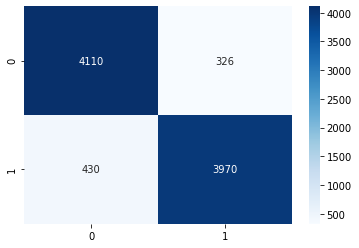

In [274]:
print('Cohen kappa Score:',cohen_kappa_score(y_test_s,rf_rs_model_pred))
print('Matthews coeff:',matthews_corrcoef(y_test_s,rf_rs_model_pred))
print('Roc Auc Score:',roc_auc_score(y_test_s,rf_rs_model_pred))
print('Accuracy Score:',accuracy_score(y_test_s,rf_rs_model_pred))
print(classification_report(y_test_s,rf_rs_model_pred))
sns.heatmap(confusion_matrix(y_test_s,rf_rs_model_pred),annot=True,fmt="g", cmap='Blues' )
plt.show()

### Random Forest Feature Importance

In [275]:
rf_rs.feature_importances_

array([3.96364953e-01, 9.95524334e-02, 1.38667495e-01, 8.53107780e-02,
       2.30397471e-04, 2.54514426e-02, 1.05722991e-02, 6.08549086e-04,
       5.73936440e-03, 3.72586618e-04, 2.87614894e-06, 4.49937031e-04,
       2.35796205e-02, 5.55111917e-04, 2.90039865e-02, 5.85136116e-03,
       5.37758379e-04, 1.37367084e-02, 5.65969933e-03, 5.28685739e-04,
       5.52483273e-03, 3.05717359e-04, 5.18806536e-05, 5.52585843e-04,
       1.34865184e-02, 9.80691230e-04, 2.28758383e-02, 1.63758741e-03,
       4.65043586e-02, 4.12538042e-02, 2.38418712e-02, 2.08270422e-04])

In [276]:
a=pd.DataFrame(X_train_s,columns=x.columns)

In [277]:
feature_results = pd.DataFrame({'feature': list(a) ,'importance': rf_rs.feature_importances_}) 

In [278]:
feature_results = feature_results.sort_values('importance', ascending = False).head(10)

<Figure size 576x432 with 0 Axes>

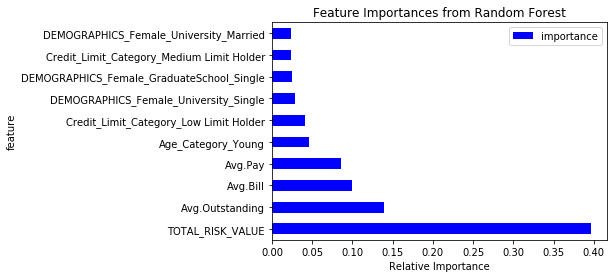

In [279]:
plt.figure(figsize=(8,6))
feature_results.loc[:, :].plot(x = 'feature', y = 'importance', kind='barh', color = 'blue')
plt.xlabel('Relative Importance')
plt.title('Feature Importances from Random Forest')
plt.show()